In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import cross_val_score, KFold

In [2]:
data1 = pd.read_csv('lingSpam.csv')
data2 = pd.read_csv('enronSpamSubset.csv')
data3 = pd.read_csv('completeSpamAssassin.csv')

data1.head()

Unnamed: 0                                               Body  Label
0           0  Subject: great part-time or summer job !\n \n ...      1
1           1  Subject: auto insurance rates too high ?\n \n ...      1
2           2  Subject: do want the best and economical hunti...      1
3           3  Subject: email 57 million people for $ 99\n \n...      1
4           4  Subject: do n't miss these !\n \n attention ! ...      1

In [3]:
data2.head()

Unnamed: 0.1  Unnamed: 0  \
0          2469        2469   
1          5063        5063   
2         12564       12564   
3          2796        2796   
4          1468        1468   

                                                Body  Label  
0  Subject: stock promo mover : cwtd\n * * * urge...      1  
1  Subject: are you listed in major search engine...      1  
2  Subject: important information thu , 30 jun 20...      1  
3  Subject: = ? utf - 8 ? q ? bask your life with...      1  
4  Subject: " bidstogo " is places to go , things...      1

In [4]:
data3.head()

Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1

In [5]:
data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [6]:
data3.head()

Body  Label
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3  ##############################################...      1
4  I thought you might like these:\n1) Slim Down ...      1

In [7]:
data = pd.concat([data1,data2,data3],axis=0)
data.head()

Body  Label
0  Subject: great part-time or summer job !\n \n ...      1
1  Subject: auto insurance rates too high ?\n \n ...      1
2  Subject: do want the best and economical hunti...      1
3  Subject: email 57 million people for $ 99\n \n...      1
4  Subject: do n't miss these !\n \n attention ! ...      1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18651 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [9]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [10]:
x = data["Body"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]
print(x_clnd_link[0])

Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-888 

In [11]:
pattern = "[^a-zA-Z0-9]"
# This means replace all the chars that follow the pattern 
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]

In [12]:
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888 

In [13]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]
print(x_tokenized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'boxes', 'with', 'credit', 'applications', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'stores', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tells', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customers', 'hundreds', 'of', 'dollars', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'checks', 'yo

In [14]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#example how lemmatizer works
words = ["bats","removed","cheers","good","stopped","went","fired","cleaner","beers"]
for word in words:
    print(lemma.lemmatize(word),end=" ")

bat removed cheer good stopped went fired cleaner beer 

In [16]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]

In [17]:
print(x_lemmatized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'box', 'with', 'credit', 'application', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'store', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tell', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customer', 'hundred', 'of', 'dollar', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'check', 'your', 'com

In [18]:
#nltk.download('stopwords')

In [19]:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

In [20]:
print(x_prepared[0])

['subject', 'great', 'part', 'time', 'summer', 'job', 'display', 'box', 'credit', 'application', 'need', 'place', 'small', 'owner', 'operated', 'store', 'area', '1', 'introduce', 'store', 'owner', 'manager', '2', 'use', '90', 'effective', 'script', 'tell', 'little', 'display', 'box', 'save', 'customer', 'hundred', 'dollar', 'drawing', 'card', 'business', 'make', '5', '00', '15', '00', 'every', 'app', 'sent', '3', 'find', 'good', 'spot', 'counter', 'place', 'box', 'say', 'nothing', 'need', 'done', 'need', 'name', 'address', 'company', 'send', 'commission', 'check', 'compensaation', '10', 'every', 'box', 'place', 'becoming', 'representative', 'could', 'also', 'earn', 'commission', '10', 'application', 'came', 'store', 'course', 'much', 'profitable', 'plan', 'pay', 'month', 'year', 'small', 'effort', 'call', '1', '888', '703', '5390', 'code', '3', '24', 'hour', 'receive', 'detail', 'removed', 'mailing', 'list', 'type', 'b2998', 'hotmail', 'com', 'area', 'remove', 'subject', 'area', 'new',

In [21]:
len(np.unique([word for text in x_prepared for word in text]))

144900

In [22]:
vectorizer = CountVectorizer(max_features=12000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()

In [23]:
x.shape

(18650, 12000)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["Label"]),random_state=42,test_size=0.2)
x_train.shape

(14920, 12000)

In [25]:
start_time = time.time()
NB = GaussianNB()
NB.fit(x_train,y_train)
end_time = time.time()
print(round(end_time-start_time,2))

3.68


In [26]:
NB.score(x_test,y_test)

0.8187667560321715

In [27]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(NB, x_train, y_train, cv=kf, scoring='accuracy')
print(scores)

[0.84383378 0.83042895 0.81903485 0.82272118 0.80965147]


In [28]:
mean=np.mean(scores)
print(mean)

0.8251340482573726


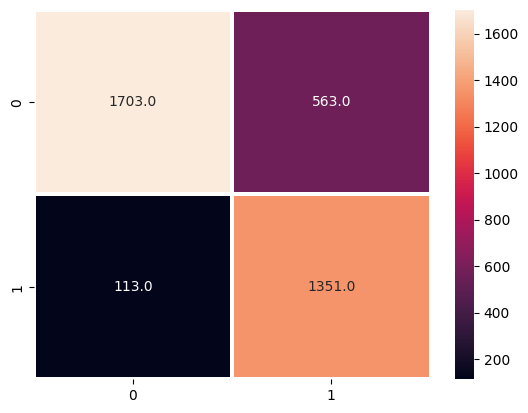

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = NB.predict(x_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
import seaborn
seaborn.heatmap(conf,annot=True,fmt=".1f",linewidths=1.5)
import matplotlib.pyplot as plt
plt.show()

In [30]:
import pickle
# We will save count vectorizer and model
with open("model.pckl",mode="wb") as F:
    pickle.dump(NB,F)
    
with open("vectorizer.pckl",mode="wb") as F:
    pickle.dump(vectorizer,F)

In [31]:
def predict_mail(mail):
    
    model = pickle.load(open("model.pckl",mode="rb"))
    vectorizer = pickle.load(open("vectorizer.pckl",mode="rb"))
    
    lemma = WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english')
    
    mail = re.sub(r"http\S+", "", mail)
    mail = re.sub("[^a-zA-Z0-9]"," ",mail)
    mail = mail.lower()
    mail = nltk.word_tokenize(mail)
    mail = [lemma.lemmatize(word) for word in mail]
    mail = [word for word in mail if word not in stopwords]
    mail = " ".join(mail)
    
    vector = vectorizer.transform([mail])
    decision = model.predict(vector.toarray())
    
    if decision[0]==0:
        return "its a ham mail"
    else:
        return "its a spam mail"

In [32]:
predict_mail('''Subject: auto insurance rates too high ?
 
 dear nlpeople , i ' m sure you ' ll agree auto insurance costs too much . even with a good driving record , " routine " rate increases can drive your costs through the roof . i have discovered a way many people can sign up with an excellent company that gives amazingly low rates . they are about half of most of the rates i ' ve found shopping around for insurance in southern california . most people either qualify or have a friend who qualifies who would love to know about it . if you do n't qualify , i have another company that operates in several western states that is cheaper than many companies who claim they have " the lowest rates available . " just send $ 2 cash to : pva 1257 n kenmore ave # 2 los angeles , ca 90029 fold it in a piece of paper with your e - mail address and i will rush the information to you right away . if you prefer a hardcopy printout , enclose a self-addressed , stamped envelope . p . s . as a bonus i include two mechanic 's tips that save lots of time on a certain common repair job , and give you a quick and easy way to check the general condition of an engine . i have n't found these in any repair manuals or books before . these are great for home mechanics !
''')

'its a spam mail'

In [33]:
predict_mail('''Subject: re : 3 . 420 fyi : morphology , concordance
 
 many thanks to henry churchyard for the speech error . any others sent either directly to me ( iyo1vaf @ uclamvs ) would be much appreciated . please give target ( if you know it ) , error , who said it , under what circumstances , ( e . g . on radio , tv , seminar , personal talk , lecture etc ) , who heard it . we do hope to have a data bank of errors available some time in the future . - - - - - - - - - - - - - - - - - - - - - - - - - - on ipa fonts . have just installed atech software ipipa fonts to use with wordstar and with word for windows and they are terrific ! one has to first get the atech stoftware powerpak font package which costs $ 59 or something and ipa is additional $ 89 i think but if you can spare the money or get someone to fund the purchase it works like a dream . vicki fromkin
''')

'its a ham mail'

In [34]:
predict_mail('''subject:	Social Networks : Result Published!!
Dear Candidate,

The exam scores and E Certificates have been released for October 2023 Exam(s).

Step 1 - Are the results of my courses released?
Please check the Results published courses list in the below links.:-
Oct 2023 Exam - Click here

Step 2 - How to check Results?
Please login to internalapp.nptel.ac.in/. and check your exam results.
Use the same login credentials as used to register to the exam.

What's next?
Please read the pass criteria carefully and check against what you have gotten.
If you still have any issues, please report the same here. internalapp.nptel.ac.in/. We will reply within a week.

Last date to report queries: 3 days within publishing of scores.

Note :

Hard copies of certificates will not be dispatched.
The duration shown in the certificate will be based on the timeline of offering of the course in 2023, irrespective of which Assignment score that will be considered.

Thanks and Best wishes.
NPTEL Team''')

'its a ham mail'

In [35]:
predict_mail('''
Check out Fantasy Handbook to pick the best for your fantasy XI
''')

'its a spam mail'

In [36]:
predict_mail('''Subject: Project Update Meeting

Hi Team,

I hope you're all doing well. We have our weekly project update meeting scheduled for this Friday at 3 PM in the meeting room. We'll be discussing the progress of ongoing projects, addressing any challenges, and planning for the upcoming week.

Please come prepared with your project updates and any blockers you might be facing. If you're unable to attend, let me know in advance.

Looking forward to productive discussions!

Best regards,
Anmol
''')

'its a ham mail'

In [37]:
predict_mail('''subject: Unlock the Future with AI Magic!🚀
If you'd like to unsubscribe and stop receiving these emails click here .
''')

'its a spam mail'

In [38]:
predict_mail('''Check out Fantasy Handbook to pick the best for your fantasy XI''')

'its a spam mail'

In [39]:
import gradio as gr
import pickle
import nltk
import re
from nltk.stem import WordNetLemmatizer

# Load the model and vectorizer
model = pickle.load(open("model.pckl", mode="rb"))
vectorizer = pickle.load(open("vectorizer.pckl", mode="rb"))

# Function to predict whether an email is ham or spam
def predict_mail(mail):
    lemma = WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')

    mail = re.sub(r"http\S+", "", mail)
    mail = re.sub("[^a-zA-Z0-9]", " ", mail)
    mail = mail.lower()
    mail = nltk.word_tokenize(mail)
    mail = [lemma.lemmatize(word) for word in mail]
    mail = [word for word in mail if word not in stopwords]
    mail = " ".join(mail)

    vector = vectorizer.transform([mail])
    decision = model.predict(vector.toarray())

    if decision[0] == 0:
        return "It's a ham mail"
    else:
        return "It's a spam mail"

# Create Gradio interface
iface = gr.Interface(fn=predict_mail, inputs="text", outputs="text", allow_flagging="never", description="Enter Your Email Below:")

# Launch the Gradio interface
iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
